In [3]:

%pylab inline
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [30]:
def MW_LMC_particles(xyz, mass, pids, NMW_particles):
    """
    Function that return the MW and the LMC particles
    positions and velocities.

    Parameters:
    -----------
    xyz: snapshot coordinates with shape (n,3)
    vxys: snapshot velocities with shape (n,3)
    pids: particles ids
    NMW_particles: Number of MW particles in the snapshot
    Returns:
    --------
    xyz_mw, vxyz_mw, xyzlmc, vxyz_lmc: coordinates and velocities of
    the MW and the LMC.

    """
    sort_indexes = np.sort(pids)
    N_cut = sort_indexes[NMW_particles]
    MW_ids = np.where(pids<N_cut)[0]
    LMC_ids = np.where(pids>=N_cut)[0]
    return xyz[LMC_ids], mass[LMC_ids]


def re_center(pos, cm):
    """
    Re center a halo to its center of mass.
    """
    pos_n = copy(pos)
    for i in range(3):
        pos_n[:,i] = pos[:,i] - cm[i]
    return pos_n

def enclosed_mass(pos, mass):
    """
    Computes the enclosed mass of a halo
····
    """
    r = (pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)**0.5
    dr = np.linspace(0.5, 20, 20)
    cm = np.zeros(len(dr))
    for i in range(len(dr)):
        index = np.where(r<dr[i])
        cm[i] = np.sum(mass[index])
    return dr, cm

    
    

lmc3 = 1.86 , snap 93

lmc4 = 2.3, snap 115

lmc5 = 2.24, snap 112

lmc6 = 2.3, snap 115.

In [33]:
def mr(snap, orbit, num_snap):
    path_sims = '/media/ngaravito/4fb4fd3d-1665-4892-a18d-bdbb1185a07b/simulations/LMCMW40M/'
    mwlmc_pos_3 = readsnap(path_sims + snap, 'pos', 'dm')
    mwlmc_mass_3 = readsnap(path_sims + snap, 'mass', 'dm')
    mwlmc_pid_3 = readsnap(path_sims + snap, 'pid', 'dm')
    lmc_pos, lmc_mass = MW_LMC_particles(mwlmc_pos_3, mwlmc_mass_3, mwlmc_pid_3, 37500000)
    orbit = np.loadtxt('LMC_orbit/orbits/' + orbit)
    lmc_pos_cm = re_center(lmc_pos, orbit[num_snap][6:9])
    r, cm_r = enclosed_mass(lmc_pos_cm, lmc_mass)
    return r, cm_r
    


In [34]:
r3, cm_r3 = mr('MWLMC3/MWLMC3_40M_b0_093' ,'LMC3_40Mb0_orbit.txt', 93)
r5, cm_r5 = mr('MWLMC5/MWLMC5_40M_b0_112' ,'LMC5_40Mb0_orbit.txt', 112)
r4, cm_r4 = mr('MWLMC4/MWLMC4_40M_b0_115' ,'LMC4_40Mb0_orbit.txt', 115)
r6, cm_r6 = mr('MWLMC6/MWLMC6_40M_b0_115' ,'LMC6_40Mb0_orbit.txt', 115)

Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs


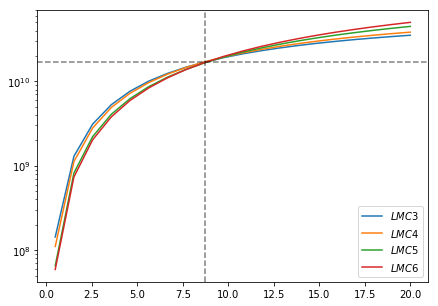

In [36]:
figure(figsize(7,5))
plt.semilogy(r3, cm_r3*1E10, label='$LMC3$')
plt.semilogy(r4, cm_r4*1E10, label='$LMC4$')
plt.semilogy(r5, cm_r5*1E10, label='$LMC5$')
plt.semilogy(r6, cm_r6*1E10, label='$LMC6$')

plt.axhline(1.7E10, ls='--', c='k', alpha=0.5)
plt.axvline(8.7, ls='--', c='k', alpha=0.5)
legend()

